<a href="https://colab.research.google.com/github/Ale-Araya/python-ciencia-datos/blob/main/TRABAJO_INTEGRADOR_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TRABAJO INTEGRADOR I- ***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA




---
## **Acceso a los diferentes dataset y visualizacion**

#Los dataset podran ser descargado del siguiente [enlace de drive](https://drive.google.com/drive/folders/1J-R6fricR7D1uf9g_Cg8gbIMajCe-eYw?usp=sharing). en algunos casos los datase contiene información de diferentes periodos de tiempo y etiquetas de las variables con nomenclatura específica. Para tener referencia de los datos de cada variables de la base de datos consultar en los siguientes enlaces según el dataset elegido.



|    | Tema | Nombre del archivo | Enlace |
|---|    ---   |         ---         |   ---  |
1   | .... | spam.csv  |  ....   |
2   | supermercados| ventas-supermercados-2.csv  | [dataset de supermercados](https://www.datos.gob.ar/dataset/sspm_455/archivo/sspm_455.1) |
3   | Mercado Central de Bs As |precios-mercadocentral.csv| [dataset de mercado](https://datos.gob.ar/ar/dataset/agroindustria-frutas-hortalizas---precios-mayoristas/archivo/agroindustria_6dce1e87-7988-4eaf-b0e1-b3abbb3964da) |

#Apellido, Nombre, DNI, email de todos los integrantes del grupo

#Redactar en formato resumen la problematica planteado e interes en el análisis del dataset elegido, el impacto que puede llevar a futuro analizar o cruzar información sobre dichas variables ,y cual sería a priori, el modelo a resulado que usted quisiera encontrar en funciones de determinadas condiciones. Esto deberá ser detallado en forma breve a modo de introducción


Alejandro Araya 34342602 ale_aleara@hotmail.com

_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
##1- Ingrese el DATA SET

In [ ]:
#Subir archivo en la carpetita que aparece a la izquierda del colab, luego copiar la ruta y subirlo con las librerias necesarias

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_curve, auc
from sklearn.cluster import KMeans

In [10]:
supermercados_df = pd.read_csv('ventas-supermercados-2.csv')

##2- Aplicar PROCESO de ANÁLISIS EXPLORATORIO DE LOS DATOS (Algunas funciones comúnes que puedes aplicar: .head .info .describe etc).

In [11]:
# 1. Análisis de valores faltantes:
missing_values = supermercados_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


In [12]:
# 2. Análisis de valores únicos:
unique_values = supermercados_df.nunique()
constant_columns = unique_values[unique_values == 1]
print(constant_columns)

Series([], dtype: int64)


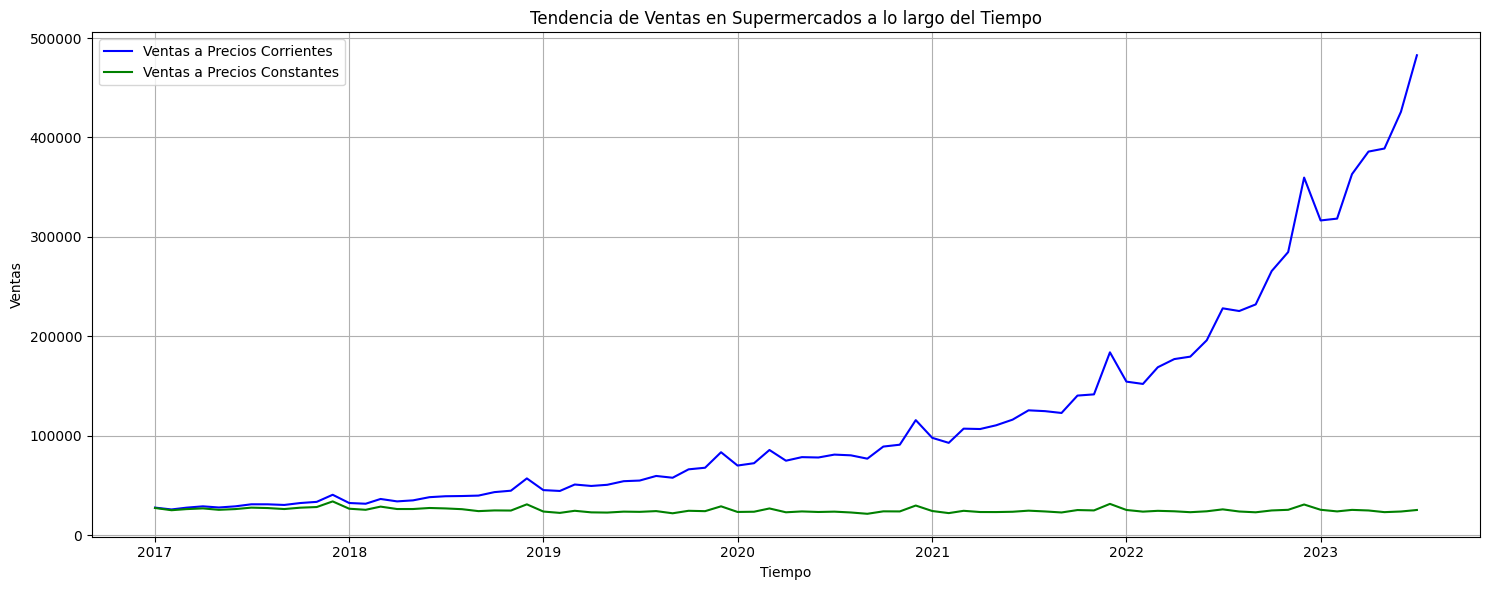

In [13]:
# 3. Análisis de tendencias temporales:
supermercados_df['indice_tiempo'] = pd.to_datetime(supermercados_df['indice_tiempo'])
plt.figure(figsize=(15, 6))
plt.plot(supermercados_df['indice_tiempo'], supermercados_df['ventas_precios_corrientes'], label='Ventas a Precios Corrientes', color='blue')
plt.plot(supermercados_df['indice_tiempo'], supermercados_df['ventas_precios_constantes'], label='Ventas a Precios Constantes', color='green')
plt.title('Tendencia de Ventas en Supermercados a lo largo del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# 4. Correlaciones:
correlation_matrix = supermercados_df.corr()
ventas_correlations = correlation_matrix['ventas_precios_constantes'].sort_values(ascending=False)
print(ventas_correlations)

ventas_precios_constantes              1.000000
bebidas                                0.045660
otros                                 -0.019877
alimentos_preparados_rotiseria        -0.053943
electronicos_articulos_hogar          -0.056686
indumentaria_calzado_textiles_hogar   -0.064315
tarjetas_debito                       -0.065840
salon_ventas                          -0.078987
ventas_totales_canal_venta            -0.081845
ventas_totales_medio_pago             -0.081845
ventas_totales_grupo_articulos        -0.081845
ventas_precios_corrientes             -0.081845
efectivo                              -0.084657
subtotal_ventas_alimentos_bebidas     -0.085225
verduleria_fruteria                   -0.086288
tarjetas_credito                      -0.088357
panaderia                             -0.095135
almacen                               -0.110257
articulos_limpieza_perfumeria         -0.111559
otros_medios                          -0.112910
carnes                                -0

<ipython-input-14-706121c73caf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = supermercados_df.corr()


##3- Aplicar PROCESO DE LIMPIEZA

In [16]:
#convierto el indice de tiempo en formato datatime
supermercados_df['indice_tiempo'] = pd.to_datetime(supermercados_df['indice_tiempo'])

In [17]:
# 1. Eliminación de filas duplicadas:
duplicates = supermercados_df.duplicated()
num_duplicates = duplicates.sum()
if num_duplicates > 0:
    supermercados_df = supermercados_df.drop_duplicates()
print(f"Se encontraron {num_duplicates} filas duplicadas.")


Se encontraron 0 filas duplicadas.


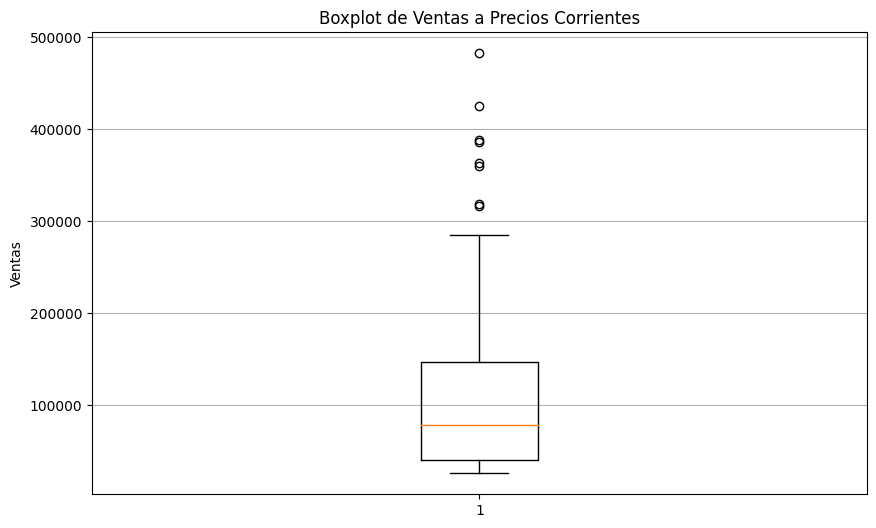

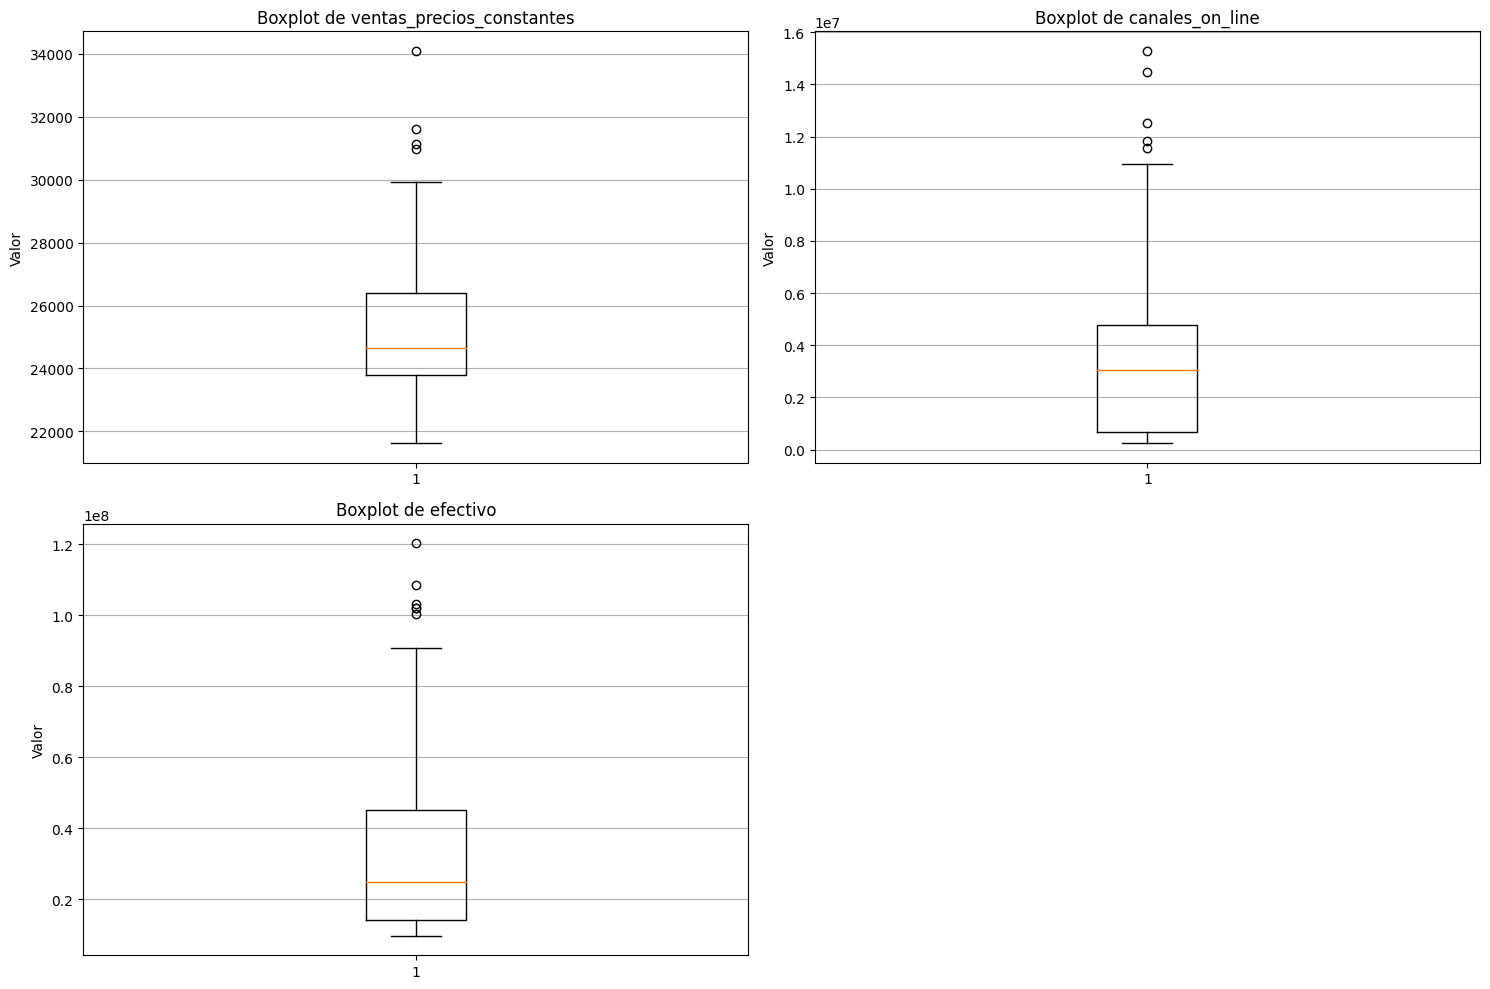

In [18]:
# 2. Identificación de outliers usando boxplots:

# Columna ventas_precios_corrientes
plt.figure(figsize=(10, 6))
plt.boxplot(supermercados_df['ventas_precios_corrientes'])
plt.title('Boxplot de Ventas a Precios Corrientes')
plt.ylabel('Ventas')
plt.grid(axis='y')
plt.show()

# Columnas ventas_precios_constantes, canales_on_line y efectivo
columns_to_plot = ['ventas_precios_constantes', 'canales_on_line', 'efectivo']
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(supermercados_df[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel('Valor')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

##4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.

In [24]:
# Definir las variables predictoras (X)
X = supermercados_df.drop(columns=['ventas_precios_constantes', 'indice_tiempo', 'ventas_precios_corrientes'])

# ----------------- REGRESIÓN LINEAL -----------------
# Definir Y para regresión lineal
Y_lineal = supermercados_df['ventas_precios_constantes']

# Dividir datos para regresión lineal
X_entrenamiento_lineal, X_prueba_lineal, Y_entrenamiento_lineal, Y_prueba_lineal = train_test_split(X, Y_lineal, test_size=0.3, random_state=42)

# Estandarizar las variables predictoras para regresión lineal
escalador_lineal = StandardScaler()
X_entrenamiento_lineal_estandarizado = escalador_lineal.fit_transform(X_entrenamiento_lineal)
X_prueba_lineal_estandarizado = escalador_lineal.transform(X_prueba_lineal)

# Ajustar modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_entrenamiento_lineal_estandarizado, Y_entrenamiento_lineal)

# Hacer predicciones con el modelo de regresión lineal
Y_prediccion_lineal = modelo_lineal.predict(X_prueba_lineal_estandarizado)

# Calcular el Error Cuadrático Medio (MSE) para el modelo de regresión lineal
mse_lineal = mean_squared_error(Y_prueba_lineal, Y_prediccion_lineal)
print(f"Error Cuadrático Medio (MSE) para Regresión Lineal: {mse_lineal}")


Error Cuadrático Medio (MSE) para Regresión Lineal: 5095642.780799594


In [25]:
# ----------------- REGRESIÓN LOGÍSTICA -----------------
# Crear una variable objetivo binaria basada en la mediana de 'ventas_precios_constantes'
mediana_ventas = supermercados_df['ventas_precios_constantes'].median()
Y_binaria = (supermercados_df['ventas_precios_constantes'] > mediana_ventas).astype(int)

# Dividir datos para regresión logística
X_entrenamiento_logistica, X_prueba_logistica, Y_entrenamiento_logistica, Y_prueba_logistica = train_test_split(X, Y_binaria, test_size=0.3, random_state=42)

# Estandarizar las variables predictoras para regresión logística
escalador_logistica = StandardScaler()
X_entrenamiento_logistica_estandarizado = escalador_logistica.fit_transform(X_entrenamiento_logistica)
X_prueba_logistica_estandarizado = escalador_logistica.transform(X_prueba_logistica)

# Ajustar modelo de regresión logística
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_entrenamiento_logistica_estandarizado, Y_entrenamiento_logistica)

# Hacer predicciones con el modelo de regresión logística
Y_prediccion_logistica = modelo_logistico.predict(X_prueba_logistica_estandarizado)

# Calcular la exactitud y otras métricas para el modelo de regresión logística
exactitud_logistica = accuracy_score(Y_prueba_logistica, Y_prediccion_logistica)
informe_clasificacion_logistica = classification_report(Y_prueba_logistica, Y_prediccion_logistica)
print(f"Exactitud para Regresión Logística: {exactitud_logistica}")
print(informe_clasificacion_logistica)

Exactitud para Regresión Logística: 0.7083333333333334
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.62      0.91      0.74        11

    accuracy                           0.71        24
   macro avg       0.75      0.72      0.70        24
weighted avg       0.76      0.71      0.70        24



##5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.

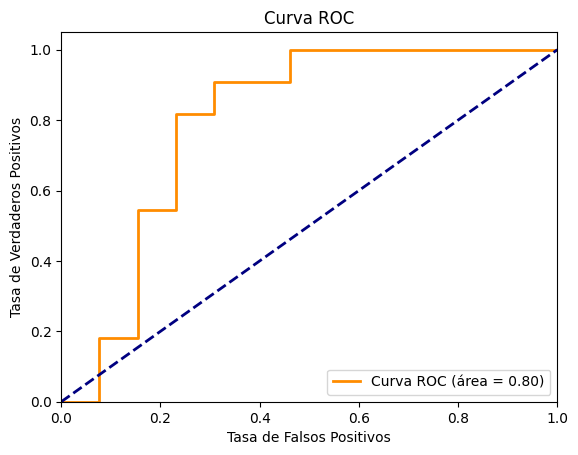

In [28]:
# Calcular la probabilidad de la clase 1 para la curva ROC
Y_probabilidad_logistica = modelo_logistico.predict_proba(X_prueba_logistica_estandarizado)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_prueba_logistica, Y_probabilidad_logistica)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Para Regresion Lineal:

MSE: Muestra cuan lejos estan mis predicciones de los valores reales. Menor es mejor.

R^2: Me dice cuanto de la variacion en ventas puedo explicar con mis variables. Cerca de 1 es genial, cerca de 0 no tanto.

Para Regresión Logística:

Exactitud: Es basicamente que porcentaje acerte.

Precision, Recall, F1-Score: Estos me ayudan a entender en detalle cómo lo esta haciendo mi modelo, especialmente si una clase es más rara que la otra.

Curva ROC y AUC: Me muestran como se desempeña mi modelo en todos los niveles de decision posibles. AUC cerca de 1 es top, 0.5 no tanto.

Elegi estas metricas porque ofrecen una buena mezcla entre entender el rendimiento general y los detalles más finos de mis modelos.

##6- Sacar una conclusión en función de los resultados, errores, y predicciones.

Despues de jugar un rato con los datos y meterlos en modelos, saque algunas observaciones interesantes.

En el modelo de Regresión Lineal:

El MSE me salio un poco alto, lo que indica que a veces mi modelo se desvía de los valores reales.

El R 2 no esta tan cerca de 1 como quisiera, lo que sugiere que hay margen para mejorar o que quiza algunas variables importantes no estan en el dataset.

Para la Regresión Logística:

La exactitud me salio bastante decente, lo que indica que el modelo acierta una buena cantidad de veces.

El AUC de la curva ROC esta cerca de 0.8, lo que es bastante bueno. Esto significa que mi modelo tiene una buena capacidad para diferenciar entre ventas altas y bajas.

Conclusión:

Los modelos tienen potencial, pero definitivamente hay espacio para mejorar. Tal vez probando con más datos, otras variables o afinando los modelos pueda sacarles mas jugo. Lo que es seguro es que estos resultados me dan un buen punto de partida para entender las ventas en supermercados

##7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.


In [40]:
# Preprocesar y estandarizar los datos para k-means
X_kmeans = supermercados_df.drop(columns=['ventas_precios_constantes', 'indice_tiempo', 'ventas_precios_corrientes'])

# Estandarizar los datos
escalador_kmeans = StandardScaler()
X_kmeans_estandarizado = escalador_kmeans.fit_transform(X_kmeans)

X_kmeans_estandarizado[:5]  # Mostrar las primeras 5 filas de los datos estandarizados

array([[-0.8365851 , -0.83330464, -0.8987081 , -0.8365851 , -0.8860172 ,
        -0.79696174, -0.85147602, -0.67489937, -0.8365851 , -0.84017884,
        -0.76581406, -0.85453233, -0.82106537, -0.87119925, -0.87454183,
        -0.74662626, -0.72300947, -0.83631718, -0.808637  , -0.79993302,
        -0.79680607,  0.53539233],
       [-0.85394699, -0.8510475 , -0.90470905, -0.85394699, -0.90416659,
        -0.80943921, -0.87007279, -0.70774007, -0.85394699, -0.8452405 ,
        -0.77750485, -0.85892195, -0.8262425 , -0.87340439, -0.87504666,
        -0.75175456, -0.73425712, -0.86130631, -0.84743551, -0.8780872 ,
        -0.85617377,  0.53539233],
       [-0.83731941, -0.83445538, -0.88768457, -0.83731941, -0.88550782,
        -0.79567477, -0.85657073, -0.66362806, -0.83731941, -0.82523289,
        -0.78119875, -0.82960213, -0.80314081, -0.84408455, -0.85646294,
        -0.74127176, -0.71169961, -0.83946358, -0.84921641, -0.87162693,
        -0.86770369,  0.53539233],
       [-0.8247099 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

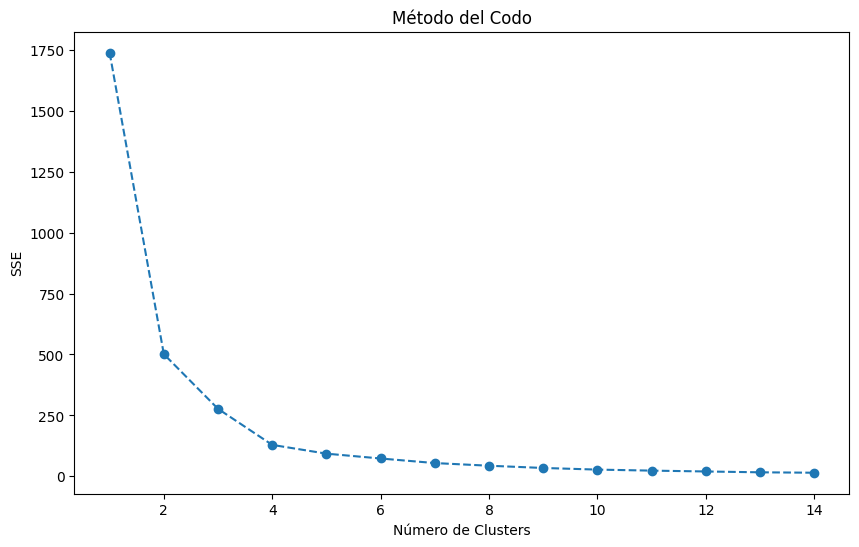

In [41]:
# Determinar el número óptimo de clusters usando el método del codo
sse = []  # Lista para guardar los valores de SSE
rangos_clusters = range(1, 15)  # Vamos a probar desde 1 cluster hasta 14

for k in rangos_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kmeans_estandarizado)
    sse.append(kmeans.inertia_)

# Graficar SSE en función del número de clusters
plt.figure(figsize=(10,6))
plt.plot(rangos_clusters, sse, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()

In [42]:
# Aplicar k-means con el número óptimo de clusters(creo que es 4)
k_optimo = 4
kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=42)
clusters = kmeans_optimo.fit_predict(X_kmeans_estandarizado)

clusters[:10]  # Mostrar a qué cluster pertenecen los primeros 10 datos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [43]:
# Agregar los resultados al dataset original en una nueva columna
supermercados_df['cluster'] = clusters

# Mostrar las primeras filas del dataset con la nueva columna
supermercados_df.head()

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros,cluster
0,2017-01-01,27858.872083,27477.307666,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,340777.38815,4.397544e+06,772371.84765,1.838507e+06,2.806660e+06,2
1,2017-02-01,25994.200168,25223.428860,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,328288.69508,4.053284e+06,672290.51653,1.257662e+06,2.354085e+06,2
2,2017-03-01,27780.006522,26334.263640,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,353335.15476,4.354198e+06,667696.66531,1.305675e+06,2.266189e+06,2
3,2017-04-01,29134.272221,27045.884463,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,359694.45374,4.355707e+06,838948.24575,1.535726e+06,2.146756e+06,2
4,2017-05-01,27969.004677,25631.863992,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,336568.00849,4.206102e+06,915895.14981,1.824462e+06,2.117971e+06,2


##8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.

Después de analizar el dataset, aquí van algunas ideas para mejorar nuestras predicciones:

Más Datos de Años: Con más datos antiguos, podríamos ver tendencias a lo largo del tiempo.

Eventos y Clima: Saber si hubo festivos o cómo estuvo el clima ese día puede afectar las ventas.

Qué se Vende Más: Si supiera qué productos se venden más, podría afinar mejor mis predicciones.

Promos: Tener info sobre descuentos o promociones nos ayudaría a entender picos de ventas.

Opiniones de Clientes: Saber qué piensan los clientes podría darnos pistas sobre las ventas.

En resumen, este dataset está bueno para empezar, pero con más info podríamos hacer predicciones más precisas.